In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import os
import statsmodels.api as sm

from scipy.stats import shapiro
from scipy.stats import norm

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


### Load Dataset into Pandas DataFrame

In [2]:
data = pd.read_csv('ENEM2017.csv', encoding = 'UTF-8', error_bad_lines=False)
data.head(10)

,Unnamed: 0,NU_IDADE,NOTA_MEDIA,sexo,raca,natureza,pai,mae,renda
0,1,18,578.18,1,branca,publica,5,2,K
1,2,19,567.04,0,branca,publica,2,4,E
2,3,18,452.42,1,branca,publica,2,2,D
3,4,17,698.00,0,branca,publica,5,4,H
4,5,18,481.30,0,parda,publica,2,2,D
5,6,24,505.64,0,branca,publica,1,2,C
6,7,17,553.02,1,parda,publica,2,2,F
7,8,17,590.96,0,branca,publica,4,4,D
8,9,19,506.26,1,parda,publica,1,1,A
9,10,17,595.78,0,preta,publica,2,2,G


In [3]:
data['natureza'].value_counts()

publica     2968
privada      929
exterior      26
Name: natureza, dtype: int64

### Dataset Exploration

In [4]:
data.shape

(3923, 9)

In [5]:
data.dtypes

Unnamed: 0      int64
NU_IDADE        int64
NOTA_MEDIA    float64
sexo            int64
raca           object
natureza       object
pai             int64
mae             int64
renda          object
dtype: object

In [6]:
data['sexo'] = data['sexo'].astype('category')
data['sexo_cat'] = data['sexo'].cat.codes
data['pai'] = data['pai'].astype('category')
data["pai_cat"] = data["pai"].cat.codes
data['mae'] = data['mae'].astype('category')
data["mae_cat"] = data["mae"].cat.codes
data['renda'] = data['renda'].astype('category')
data["renda_cat"] = data["renda"].cat.codes
data['raca'] = data['raca'].astype('category')
data['raca_cat'] = data['raca'].cat.codes
data['natureza'] = data['natureza'].astype('category')
data['natureza_cat'] = data['natureza'].cat.codes

In [7]:
data.dtypes

Unnamed: 0         int64
NU_IDADE           int64
NOTA_MEDIA       float64
sexo            category
raca            category
natureza        category
pai             category
mae             category
renda           category
sexo_cat            int8
pai_cat             int8
mae_cat             int8
renda_cat           int8
raca_cat            int8
natureza_cat        int8
dtype: object

In [8]:
data.describe()

,Unnamed: 0,NU_IDADE,NOTA_MEDIA,sexo_cat,pai_cat,mae_cat,renda_cat,raca_cat,natureza_cat
count,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000
mean,1962.000000,17.538618,535.393005,0.565893,2.299771,1.974764,5.625032,1.616620,1.749936
std,1132.616881,1.867138,74.129816,0.495702,0.963043,1.060450,3.684021,1.050412,0.448150
min,1.000000,16.000000,243.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,981.500000,17.000000,485.650000,0.000000,2.000000,1.000000,3.000000,1.000000,2.000000
50%,1962.000000,17.000000,529.880000,1.000000,2.000000,2.000000,5.000000,1.000000,2.000000
75%,2942.500000,18.000000,582.590000,1.000000,3.000000,3.000000,7.000000,3.000000,2.000000
max,3923.000000,58.000000,773.000000,1.000000,4.000000,4.000000,16.000000,4.000000,2.000000


In [9]:
data.corr()

,Unnamed: 0,NU_IDADE,NOTA_MEDIA,sexo_cat,pai_cat,mae_cat,renda_cat,raca_cat,natureza_cat
Unnamed: 0,1.000000,0.049135,-0.200344,-0.117473,-0.072292,-0.081569,-0.048955,-0.005138,0.068053
NU_IDADE,0.049135,1.000000,-0.109761,-0.025546,-0.136752,-0.118687,-0.070602,0.013401,0.056185
NOTA_MEDIA,-0.200344,-0.109761,1.000000,-0.042951,0.363383,0.357119,0.445967,-0.168830,-0.517378
sexo_cat,-0.117473,-0.025546,-0.042951,1.000000,-0.042456,-0.057224,-0.089437,0.013272,0.024265
pai_cat,-0.072292,-0.136752,0.363383,-0.042456,1.000000,0.482520,0.540575,-0.170422,-0.463125
mae_cat,-0.081569,-0.118687,0.357119,-0.057224,0.482520,1.000000,0.495157,-0.161134,-0.440882
renda_cat,-0.048955,-0.070602,0.445967,-0.089437,0.540575,0.495157,1.000000,-0.202012,-0.570306
raca_cat,-0.005138,0.013401,-0.168830,0.013272,-0.170422,-0.161134,-0.202012,1.000000,0.200896
natureza_cat,0.068053,0.056185,-0.517378,0.024265,-0.463125,-0.440882,-0.570306,0.200896,1.000000


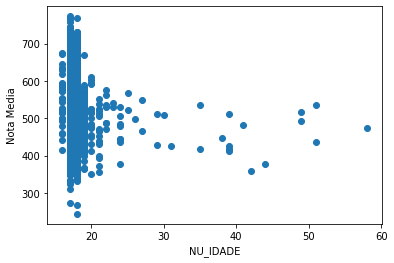

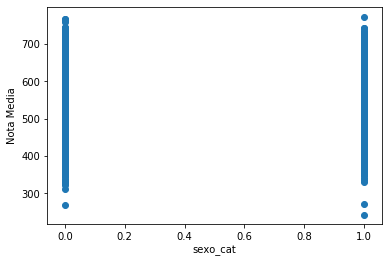

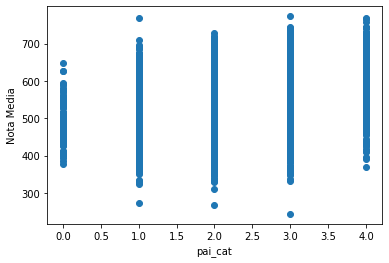

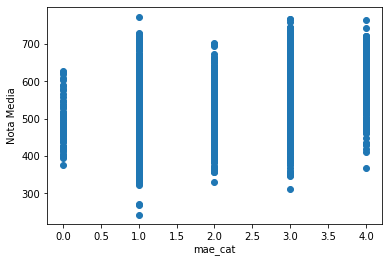

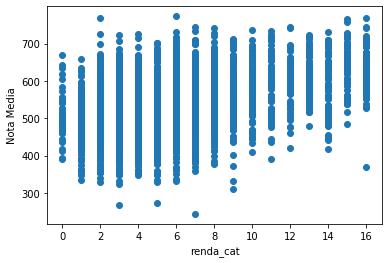

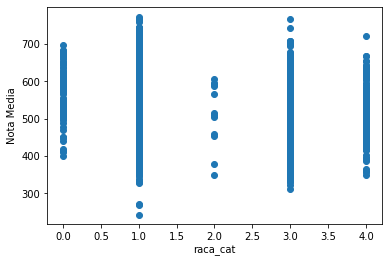

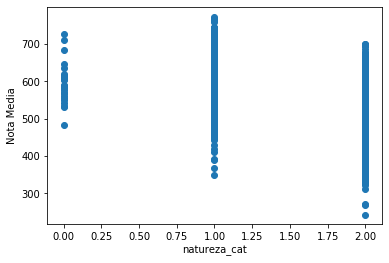

In [10]:
lst = ['NU_IDADE','sexo_cat','pai_cat','mae_cat','renda_cat','raca_cat','natureza_cat']
for i in lst:
    plt.scatter(data[i], data['NOTA_MEDIA'])
    plt.xlabel(i)
    plt.ylabel('Nota Media')
    plt.show()

### Teste de Normalidade (SHAPIRO) na variável independente

/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


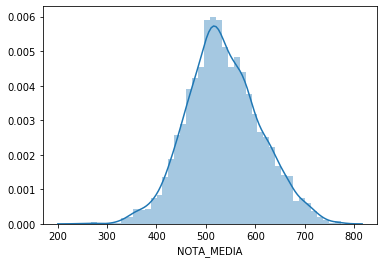

In [11]:
sns.distplot(data['NOTA_MEDIA'])

### Teste de SHAPIRO

In [12]:
stats, p = shapiro(data['NOTA_MEDIA'])
print(stats)
print(p) # se o p-valor for menor que a significancia alpha, a hipotese nula é rejeitada

0.9972172975540161
1.3315283240444842e-06


In [29]:
from scipy import stats

lst = ['sexo_cat','pai_cat','mae_cat','renda_cat','raca_cat','natureza_cat']

for i in lst:
    kw, p = stats.kruskal(data['NOTA_MEDIA'], data[i])

    print('Kruskal-Wallis para '+i)
    print('==============')
    print('KW value:',kw)
    print('p value:',p,'\n')

Kruskal-Wallis para sexo_cat
KW value: 6083.773813799077
p value: 0.0 

Kruskal-Wallis para pai_cat
KW value: 5952.684263232041
p value: 0.0 

Kruskal-Wallis para mae_cat
KW value: 5982.244867160137
p value: 0.0 

Kruskal-Wallis para renda_cat
KW value: 5892.0960571840005
p value: 0.0 

Kruskal-Wallis para raca_cat
KW value: 6143.208149087871
p value: 0.0 

Kruskal-Wallis para natureza_cat
KW value: 6231.407193209667
p value: 0.0 



### Teste de Dunn - Quando a H0 é aceita

In [14]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [15]:
import scikit_posthocs as sp

In [53]:
data['sexo_cat'].value_counts()

1    2220
0    1703
Name: sexo_cat, dtype: int64

In [58]:
# DUNN PARA SEXO
lst = [data[data['sexo_cat']==0]['NOTA_MEDIA'],
data[data['sexo_cat']==1]['NOTA_MEDIA']]

df = sp.posthoc_dunn(lst,p_adjust='holm')

df = pd.DataFrame(np.where(abs(df) >= 0.05, 'true', 'false'))
df

,0,1
0,true,false
1,false,true


In [52]:
fem = data[data['sexo'] == 0]['NOTA_MEDIA'].mean()
mas = data[data['sexo'] == 1]['NOTA_MEDIA'].mean()

print('Média Sexo 0:', round(fem,4))
print('Média Sexo 1:', round(mas,4))
print('Diferença entre as médias: ', round(abs(mas-fem),4))

Média Sexo 0: 539.0278
Média Sexo 1: 532.6047
Diferença entre as médias:  6.4231


In [69]:
data['renda_cat'].value_counts()

2     603
4     495
6     495
3     468
5     380
7     337
8     217
1     206
9     164
16     94
13     92
10     85
14     73
11     64
15     62
12     52
0      36
Name: renda_cat, dtype: int64

In [59]:
# DUNN PARA RENDA
lst = [data[data['renda_cat']==0]['NOTA_MEDIA'],
data[data['renda_cat']==1]['NOTA_MEDIA'],
data[data['renda_cat']==2]['NOTA_MEDIA'],
data[data['renda_cat']==3]['NOTA_MEDIA'],
data[data['renda_cat']==4]['NOTA_MEDIA'],
data[data['renda_cat']==5]['NOTA_MEDIA'],
data[data['renda_cat']==6]['NOTA_MEDIA'],
data[data['renda_cat']==7]['NOTA_MEDIA'],
data[data['renda_cat']==8]['NOTA_MEDIA'],
data[data['renda_cat']==9]['NOTA_MEDIA'],
data[data['renda_cat']==10]['NOTA_MEDIA'],
data[data['renda_cat']==11]['NOTA_MEDIA'],
data[data['renda_cat']==12]['NOTA_MEDIA'],
data[data['renda_cat']==13]['NOTA_MEDIA'],
data[data['renda_cat']==14]['NOTA_MEDIA'],
data[data['renda_cat']==15]['NOTA_MEDIA'],
data[data['renda_cat']==16]['NOTA_MEDIA']]

df = sp.posthoc_dunn(lst,p_adjust='holm')

df = pd.DataFrame(np.where(abs(df) >= 0.05, 'true', 'false'))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,true,true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false
1,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false
2,true,true,true,false,true,false,false,false,false,false,false,false,false,false,false,false,false
3,true,false,false,true,true,true,true,false,false,false,false,false,false,false,false,false,false
4,true,false,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false
5,true,false,false,true,true,true,true,false,false,false,false,false,false,false,false,false,false
6,true,false,false,true,false,true,true,false,false,false,false,false,false,false,false,false,false
7,false,false,false,false,false,false,false,true,true,true,true,true,true,false,false,false,false
8,false,false,false,false,false,false,false,true,true,true,true,true,true,false,true,false,false
9,false,false,false,false,false,false,false,true,true,true,true,true,true,false,true,false,false


In [55]:
data['pai_cat'].value_counts()

2    1526
3    1176
1     690
4     438
0      93
Name: pai_cat, dtype: int64

In [60]:
# DUNN PARA PAI
lst = [data[data['pai_cat']==0]['NOTA_MEDIA'],
data[data['pai_cat']==1]['NOTA_MEDIA'],
data[data['pai_cat']==2]['NOTA_MEDIA'],
data[data['pai_cat']==3]['NOTA_MEDIA'],
data[data['pai_cat']==4]['NOTA_MEDIA']]

df = sp.posthoc_dunn(lst,p_adjust='holm')

df = pd.DataFrame(np.where(abs(df) >= 0.05, 'true', 'false'))
df

,0,1,2,3,4
0,true,true,false,false,false
1,true,true,true,false,false
2,false,true,true,false,false
3,false,false,false,true,false
4,false,false,false,false,true


In [61]:
# DUNN PARA MAE
lst = [data[data['mae_cat']==0]['NOTA_MEDIA'],
data[data['mae_cat']==1]['NOTA_MEDIA'],
data[data['mae_cat']==2]['NOTA_MEDIA'],
data[data['mae_cat']==3]['NOTA_MEDIA'],
data[data['mae_cat']==4]['NOTA_MEDIA']]

df = sp.posthoc_dunn(lst,p_adjust='holm')

df = pd.DataFrame(np.where(abs(df) >= 0.05, 'true', 'false'))
df

,0,1,2,3,4
0,true,false,false,false,false
1,false,true,true,false,false
2,false,true,true,false,false
3,false,false,false,true,false
4,false,false,false,false,true


In [62]:
data['raca_cat'].value_counts()

1    2701
3     879
4     245
0      86
2      12
Name: raca_cat, dtype: int64

In [63]:
# DUNN PARA RAÇA
lst = [data[data['raca_cat']==0]['NOTA_MEDIA'],
data[data['raca_cat']==1]['NOTA_MEDIA'],
data[data['raca_cat']==2]['NOTA_MEDIA'],
data[data['raca_cat']==3]['NOTA_MEDIA'],
data[data['raca_cat']==4]['NOTA_MEDIA']]

df = sp.posthoc_dunn(lst,p_adjust='holm')

df = pd.DataFrame(np.where(abs(df) >= 0.05, 'true', 'false'))
df

,0,1,2,3,4
0,true,false,true,false,false
1,false,true,true,false,false
2,true,true,true,true,true
3,false,false,true,true,true
4,false,false,true,true,true


In [64]:
data['natureza_cat'].value_counts()

2    2968
1     929
0      26
Name: natureza_cat, dtype: int64

In [65]:
# DUNN PARA NATUREZA
lst = [data[data['natureza_cat']==0]['NOTA_MEDIA'],
data[data['natureza_cat']==1]['NOTA_MEDIA'],
data[data['natureza_cat']==2]['NOTA_MEDIA'],
data[data['natureza_cat']==3]['NOTA_MEDIA']]

df = sp.posthoc_dunn(lst,p_adjust='holm')

df = pd.DataFrame(np.where(abs(df) >= 0.05, 'true', 'false'))
df

,0,1,2
0,true,true,false
1,true,true,false
2,false,false,true


### Run the Linear Regression 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

mae = []
mse = []
rmse = []
best_intercept = float('inf')
best_coef = float('inf')
best_rmse = float('inf')

lst = ['pai_cat','mae_cat','renda_cat','raca_cat','natureza_cat']

X = pd.DataFrame(data[lst]) #independent
y = data['NOTA_MEDIA'] #dependent

for num in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    linearRegressor = LinearRegression()
    model = linearRegressor.fit(X_train, y_train)
    #print('\nrepetition number {}'.format(num+1))
    
    intercept = linearRegressor.intercept_ #intercepto ou coef linear
    coef = linearRegressor.coef_ #coef angular ou slope

    #previsao
    y_pred = linearRegressor.predict(X_test)
    
    #MAE
    #print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

    #MSE
    #print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

    #RMSE
    #print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
    
    #salvando as medias em uma lista
    mae.append(metrics.mean_absolute_error(y_test, y_pred))
    mse.append(metrics.mean_squared_error(y_test, y_pred))
    rmse.append(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
    
    # Saving variables for the best prediction based on RMSE
    if np.sqrt(metrics.mean_absolute_error(y_test, y_pred)) < best_rmse:
        best_model = model
        best_intercept = intercept
        best_coef = coef
        best_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
        best_X_train, best_X_test, best_y_train, best_y_test = X_train, X_test, y_train, y_test
                            
#printar a media dos erros de 1000 repeticoes

print("===MAE===")
print("MAE médio: ", round(np.mean(mae),4))
print("MAE desvio padrão: ", round(np.std(mae),4))
print("\n===MSE===")
print("MSE médio: ", round(np.mean(mse),4))
print("MSE desvio padrão: ", round(np.std(mse),4))
print("\n===RMSE===")
print("RMSE médio: ", round(np.mean(rmse),4))
print("RMSE desvio padrão: ", round(np.std(rmse),4))
print("")
print('Best Model based on RMSE:', best_model)
print('Best Model SCORE:',round(best_model.score(best_X_train, best_y_train),4))
print('Best Model Intercept:', round(best_intercept,4))
print('Best Model Coef:', round(best_coef[0],4))
print('Best RMSE:', round(best_rmse,4))

===MAE===
MAE médio:  47.9333
MAE desvio padrão:  0.8523

===MSE===
MSE médio:  3787.1453
MSE desvio padrão:  133.2789

===RMSE===
RMSE médio:  6.9231
RMSE desvio padrão:  0.0616

Best Model based on RMSE: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Best Model SCORE: 0.3013
Best Model Intercept: 602.6559
Best Model Coef: 3.8361
Best RMSE: 6.6683


In [19]:
lst = ['sexo_cat','pai_cat','mae_cat','renda_cat','raca_cat','natureza_cat']

#independent
X = data[lst] 
X = sm.add_constant(X)
#dependent
y = data['NOTA_MEDIA']
    
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NOTA_MEDIA   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     298.6
Date:                Sat, 14 Dec 2019   Prob (F-statistic):          8.09e-316
Time:                        12:05:35   Log-Likelihood:                -21719.
No. Observations:                3923   AIC:                         4.345e+04
Df Residuals:                    3916   BIC:                         4.350e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          600.8371      7.324     82.035      0.000     586.478     615.197
sexo_cat        -1.7970      1.989     -0.903      0.366      -5.697       2.103
pai_cat          5.1706      1.287      4.018      0.000       2.647       7.694
mae_cat          5.9034      1.131      5.218      0.000       3.685       8.121
renda_cat        3.1980      0.362      8.835      0.000       2.488       3.908
raca_cat        -2.9098      0.961     -3.027      0.002      -4.794      -1.025
natureza_cat   -57.8654      2.786    -20.770      0.000     -63.328     -52.403
==============================================================================
Omnibus:                       33.920   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.430
Skew:                          -0.166   Prob(JB):                     2.74e-09
Kurtosis:                       3.361   Cond. No.                         60.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lst = ['pai_cat','mae_cat','renda_cat','raca_cat','natureza_cat']

#independent
X = data[lst] 
X = sm.add_constant(X)
#dependent
y = data['NOTA_MEDIA']
    
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NOTA_MEDIA   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     358.2
Date:                Sat, 14 Dec 2019   Prob (F-statistic):          6.11e-317
Time:                        12:05:35   Log-Likelihood:                -21719.
No. Observations:                3923   AIC:                         4.345e+04
Df Residuals:                    3917   BIC:                         4.349e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          599.4872      7.170     83.611      0.000     585.430     613.544
pai_cat          5.1640      1.287      4.013      0.000       2.641       7.687
mae_cat          5.9275      1.131      5.241      0.000       3.710       8.145
renda_cat        3.2233      0.361      8.932      0.000       2.516       3.931
raca_cat        -2.9078      0.961     -3.025      0.003      -4.792      -1.023
natureza_cat   -57.7770      2.784    -20.751      0.000     -63.236     -52.318
==============================================================================
Omnibus:                       32.596   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.825
Skew:                          -0.162   Prob(JB):                     6.12e-09
Kurtosis:                       3.355   Cond. No.                         59.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#previsao

predictions = model.predict(X)
df = pd.DataFrame({'Actual': y, 'Predicted': np.round(predictions,2)})
df

,Actual,Predicted
0,578.18,539.84
1,567.04,516.87
2,452.42,501.79
3,698.00,542.03
4,481.30,495.97
...,...,...
3918,574.26,593.36
3919,569.28,530.42
3920,536.86,528.48
3921,523.06,507.06


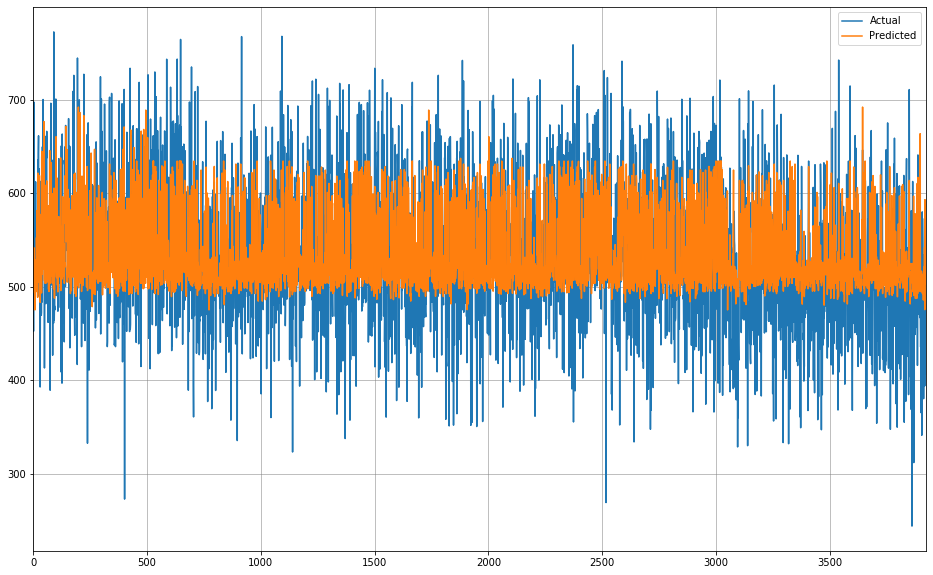

In [22]:
df.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

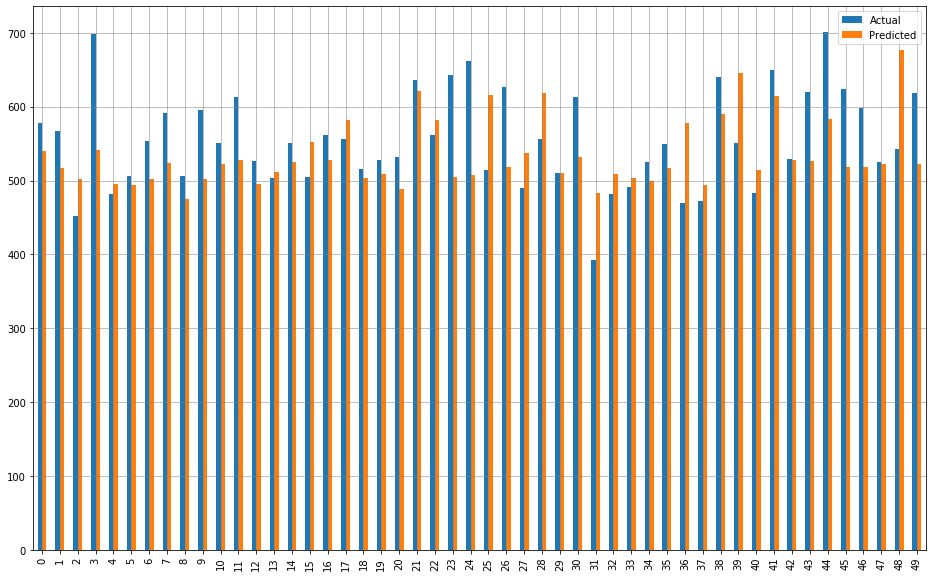

In [23]:
df = df.head(50)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Análise do Erro: Homocedasticidade e Normalidade do Erro – 𝑁(0, 𝜎2)

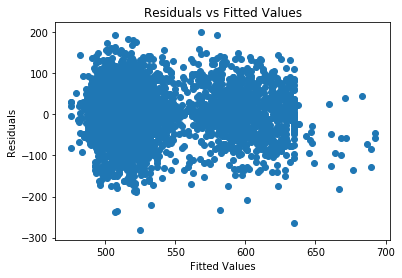

In [24]:
plt.plot(model.fittedvalues, model.resid, 'o') 
plt.title('Residuals vs Fitted Values') 
plt.xlabel('Fitted Values') 
plt.ylabel('Residuals')
plt.show()

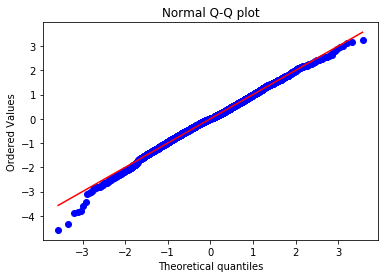

W: 0.9969 p-value: 0.0000


/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


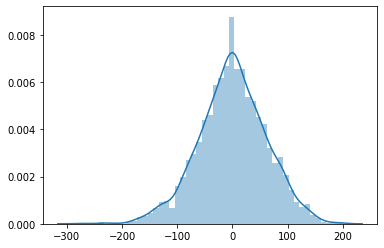

In [25]:
from scipy import stats

z = (model.resid - model.resid.mean()) / model.resid.std() 

stats.probplot(z, dist="norm", plot=plt) 
plt.title("Normal Q-Q plot")
plt.show()

#Teste de Normalidade
stats, p = stats.shapiro(model.resid) 
print("W: %.4f p-value: %.4f" % (stats,p))

#Gráfico de Densidade 
sns.distplot(model.resid)

In [75]:
data['natureza_cat'].value_counts()

2    2968
1     929
0      26
Name: natureza_cat, dtype: int64

In [76]:
data.groupby(['renda_cat', 'natureza_cat']).size().unstack(fill_value=0).T

renda_cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
natureza_cat,,,,,,,,,,,,,,,,,
0,0,1,0,0,1,1,3,2,2,2,2,1,1,4,0,3,3
1,5,8,29,31,43,51,84,98,98,77,48,43,37,77,57,54,89
2,31,197,574,437,451,328,408,237,117,85,35,20,14,11,16,5,2
